In [4]:
import numpy as np
import plotly
import plotly.graph_objs as go

In [195]:
def CIR(current_rate, volatility, mean, velocity):
    deterministic_term = current_rate + velocity*(mean - current_rate)
    stochastic_term = volatility*np.sqrt(current_rate)*(np.random.randn(1)[0])
    return deterministic_term + stochastic_term

def compute_path_payoff(path, upper_barrier, lower_barrier, maturity_date, max_payoff):
    path_until_end = path[:maturity_date]
    filter = (path_until_end <= upper_barrier) & (path_until_end >= lower_barrier)
    return filter.astype(np.int32).sum()

def generate_path(params):
    RUB_rate = np.array([params[0]])
    for _ in range(STEP_AMOUNT):
        RUB_rate= np.append(RUB_rate, CIR(*params))
    return RUB_rate

def generate_paths(params):
    paths = []
    for _ in range(2):
        paths.append(generate_path(params))
    return np.array(paths)
    
def compute_payoffs(upper_barrier, lower_barrier, maturity_date, max_payoff, config):
    paths = generate_paths(config)
    func = lambda path: compute_path_payoff(path, upper_barrier, lower_barrier, maturity_date, max_payoff)
    return np.array(list(map(func, paths))), paths

In [196]:
RUB_START_POINT = 7.45
RUB_VOLATILITY = 0.1
RUB_MEAN_RATE = 6.777795918367346
RUB_MEAN_REVERSION_VELOCITY = 0.01231185014718937
STEP_AMOUNT = 100

payoffs, paths = compute_payoffs(RUB_START_POINT + 1, RUB_START_POINT - 1, 100, 100, \
                          [RUB_START_POINT, RUB_VOLATILITY, RUB_MEAN_RATE, RUB_MEAN_REVERSION_VELOCITY])

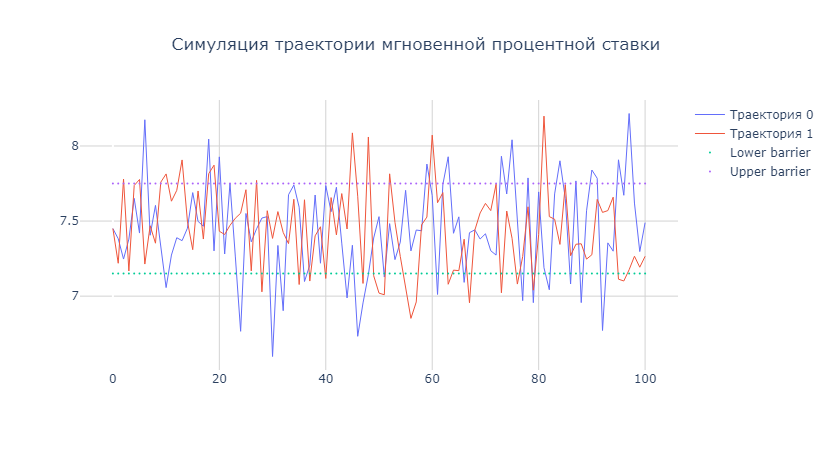

In [197]:
fig = go.Figure()
fig.update_yaxes(gridcolor='LightGray')
fig.update_xaxes(gridcolor='LightGray')
for i in range(2):
    fig.add_trace(go.Scatter(x=list(range(STEP_AMOUNT+1)), y=paths[i], \
                             mode='lines', line_width=1, name= f"Траектория {i}"))
fig.add_trace(go.Scatter(x=list(range(STEP_AMOUNT+1)), y=np.array([RUB_START_POINT - 0.3]*(STEP_AMOUNT+1)), \
                         mode='markers', marker_size=2, name= "Lower barrier"))
fig.add_trace(go.Scatter(x=list(range(STEP_AMOUNT+1)), y=np.array([RUB_START_POINT + 0.3]*(STEP_AMOUNT+1)), \
                         mode='markers', marker_size=2, name= "Upper barrier"))
fig.update_layout(title='Симуляция траектории мгновенной процентной ставки', title_x=0.5, 
                  height=450, width=800,plot_bgcolor='rgba(0,0,0,0)')


In [199]:
payoffs

array([100, 100])